# Projet SML : prédiction d'emojis
Thaïs Baudon - Margot Masson (notebook de Margot Masson)

## Introduction

Ce travail est réalisé dans le cadre du module SML du master SIF de Rennes. Au cours de ce module, nous avons appris à poser un problème de machine learning et étudié un certain nombre d'algorithmes de machine learning. Le projet dont ce notebook fait état avait pour but de nous faire manipuler ces différents algorithmes en les mettant en oeuvre sur un cas concret. Ce notebook comporte donc la formulation du problème, le traitement des données, les tests que nous avons effectués sur les algorithmes choisis, et enfin un comparaison de ces algorithmes. Il est à compléter par le notebook de mon binôme Thaïs Baudon qui s'est chargée plus spécifiquement de certaines parties.

## Formulation du problème

Nous avons décidé de travailler sur le sujet de prédiction d'emojis. Notre but est de prédire l’emoji contenu dans un tweet inconnu. C’est donc un problème de classification de texte, avec plusieurs classes.

Nous disposons de données issues d'une compétition qui a fait l'objet d'un papier : SemEval 2018 task 2. Ces données sont composées de tweets en anglais et en espagnol qui contiennent chacun exactement un emoji parmi les 20 plus fréquemment utilisés. Ces emojis ont été mappés, et ont donc chacun un code attribué :

| Country | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 |
| ------- | - | - | - | - | - | - | - | - | - | - | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| USA | ❤️ | 😍 | 😂 | 💕 | 🔥 | 😊 | 😎 | ✨ | 💙 | 😘 | 📷 | 🇺🇸 | ☀️ | 💜 | 😉 | 💯 | 😁 | 🎄 | 📸 | 😜 |
| ESP | ❤️ | 😍 | 😂 | 💕 | 😊 | 😘 | 💪 | 😉 | 👌 | es | 😎 | 💙 | 💜 | 😜 | 💞 | ✨ | 🎶 | 💘 | 😁 | 🔝 |

Pour aborder ce problème, nous avons mis en place la stratégie suivante :
* exploration des données
* choix de la représentation des données
* choix de 4 algorithmes de classification
* tests de ces algorithmes
* comparaison entre les algorithmes

## Exploration des données

Les données utilisées sont issues de tweets collectés par l'équipe SemEval au cours de leur travail sur la prédiction d'emojis [[1]](https://www.aclweb.org/anthology/S18-1003.pdf). Il s'agit de textes de tweets, contenant chacun un emoji, en anglais ou en espagnol. Les données téléchargées sont déjà séparées en trois groupes : train, test et trial. Dans chacun de ces sous dossiers, il y a trois fichiers pour chaque langue (anglais américain ou espagnol) : les tweets complets (ce fichier ne nous sera pas utile), le texte des tweets sans l'emoji (un tweet par ligne) et les labels (un code par ligne). Chaque emoji a un code, différent selon la langue. A priori, il ne sera donc pas utile de préprocesser les données puisque le travail a déjà été effectué. 

Avant de commencer tout exercice de classification, nous avons cependant exploré ces données plus avant pour en avoir une vision plus précise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
import time

In [2]:
def to_dataframe(path_data,path_labels):
    file = open(path_data, "r", encoding="utf8")
    data = file.readlines()
    file.close()
    for i in range(len(data)):
        data[i]=data[i].replace("\n","")

    file = open(path_labels, "r", encoding="utf8")
    labels = file.readlines()
    file.close()
    for i in range(len(labels)):
        labels[i]=labels[i].replace("\n","")

    liste_2_np = []
    for i in range (0,len(labels)):
        tmp=[data[i],labels[i]]
        liste_2_np+=[tmp]

    np_array=np.array(liste_2_np)
    data_df = pd.DataFrame(np_array, columns = ["tweet_text","label"])
    return data_df

def show_data_distribution(data_df,data_type):
    x = [(int)(data_df["label"][i]) for i in range (len(data_df["label"]))]
    x.sort()
    for i in range (len(x)):
        x[i]=str(x[i])
    plt.hist(x,range= (1,20),bins=19, color = 'yellow',
                edgecolor = 'red')
    plt.xlabel('type d\'emojis')
    plt.ylabel('nombre d\'emojis')
    plt.title('Répartition des emojis dans les tweets ('+data_type+')')

In [3]:
train_data_df = to_dataframe('data/train/tweets.us.text','data/train/tweets.us.labels')
test_data_df = to_dataframe('data/test/tweets.us.text','data/test/tweets.us.labels')
val_data_df = to_dataframe('data/trial/tweets.us.text','data/trial/tweets.us.labels')

414347


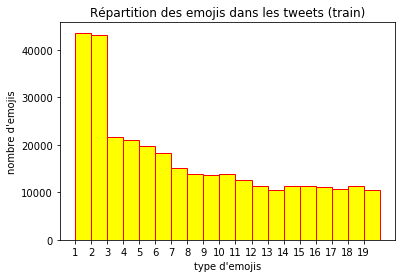

In [4]:
print(len(train_data_df))
show_data_distribution(train_data_df,"train")

50000


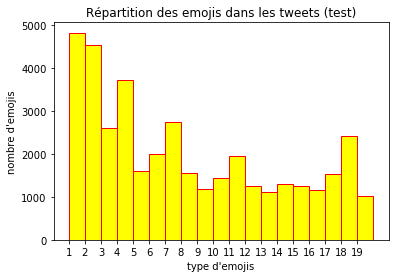

In [5]:
print(len(test_data_df))
show_data_distribution(test_data_df,"test")

50000


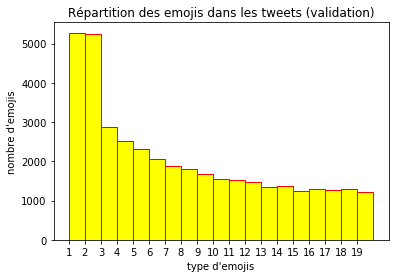

In [6]:
print(len(val_data_df))
show_data_distribution(val_data_df,"validation")

In [7]:
train_data_df = to_dataframe('data/train/tweets.es.text','data/train/tweets.es.labels')
test_data_df = to_dataframe('data/test/tweets.es.text','data/test/tweets.es.labels')
val_data_df = to_dataframe('data/trial/tweets.es.text','data/trial/tweets.es.labels')

84942


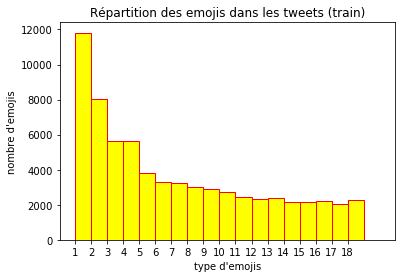

In [8]:
print(len(train_data_df))
show_data_distribution(train_data_df,"train")

10000


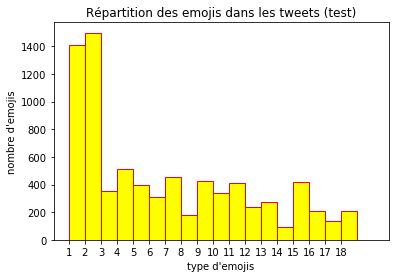

In [9]:
print(len(test_data_df))
show_data_distribution(test_data_df,"test")

10000


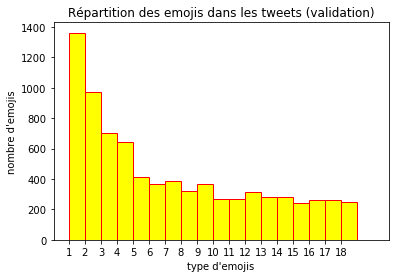

In [10]:
print(len(val_data_df))
show_data_distribution(val_data_df,"validation")

On remarque que le jeu de données, que ce soit en espagnol ou en américain, n’est pas très équilibré. Pour les tweets d’apprentissage, les emojis 1 et 2 sont deux fois plus fréquents que l’emoji 3, et ensuite ça décroit doucement jusqu’au dernier emoji qui est deux fois moins fréquent. Cela est représentatif de l'utilisation des emojis dans les messages. En effet, les emojis 1 et 2, qui sont respectivement le coeur et les yeux en coeur, sont très fréquemment utilisés, tandis que l'emoji sapin de noël (17) ne l'est presque jamais en dehors de la période des fêtes de fin d'année. Ce constat est vrai dans les deux langues, bien que les emojis espagnols soient moins nombreux que ceux américains. 

## Représentation des données

Pour la représentation des données (feature extraction), nous nous sommes appuyées sur la documentation de scikit-learn [doc](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). Nous avons exploré plusieurs possibilités, qui conserve de façon plus ou moins efficaces l'information séquentielle contenue dans les tweets. Pour appliquer des algorithmes de machine learning, on a besoin de transformer le texte en vecteurs de taille fixe. Il existe pour cela plusieurs méthodes. Nous en avons exploré trois : les sacs de mots, les n-grams et word2vec.

### Bag of words

Le plus simple est de traiter chaque tweet comme un multiset de mots.
A partir de notre corpus, on détermine un vocabulaire constitué des mots "significatifs". Ensuite chaque tweet est représenté par un vecteur de la taille de notre vocabulaire, dont les valeurs correspondent au nombre d'occurences, ou à la fréquence, ou au _tf-idf_ de chaque mot.

Pour arriver à une représentation _bag_ _of_ _words_ on réalise trois étapes:
1. Tokenization
2. Counting
3. Normalization

### N-grams

Un n-gramme est une sous-séquence de n éléments construite à partir d'une séquence donnée. Etant donné qu'un sac de mots peut être vu comme un unigramme, on peut raffiner cette approche en prenant des n-grammes avec n > 1. Il semblerait que ce soit particulièrement judicieux pour construire des noyaux de svm. L' idée des n-grammes est que, à partir d'une séquence de mots donnée, il est possible d'obtenir la fonction de vraisemblance de l'apparition du mot suivant. Dans le cas de l'utilisation de n-grammes, au lieu de compter les occurences de chaque mot comme dans les sacs de mots, on compte les occurences de chaque n-gramme).

Il existe des librairies python permettant de fabriques des n-grammes, et scikit learn propose des méthodes permettant d'utiliser les n-grammes.

### Word2vec

Word2vec est un type de modèles utilisé pour le word embedding. Ce sont des réseaux de neurones artificiels à deux couches entraînés pour modéliser le contexte des mots. Word2vec modélise les mots comme des vecteurs de réels. C'est un peu plus fin que les n-grams car plus deux vecteurs sont proches, plus les mots correspondants sont proches sémantiquement. C'est donc modèle qui est censé mieux capturer l'information sémantique.
> Référence word2vec: Mikolov, Tomas; et al. (2013). "Efficient Estimation of Word Representations in Vector Space". arXiv:1301.3781
> Vulgarisation: https://wiki.pathmind.com/word2vec
> Open-source version: https://code.google.com/archive/p/word2vec/

Bien qu'ils soient efficaces, ces modèles souffrent d'un inconvénient : la représentation des mots est très opaques pour des humains.

## Algorithmes choisis

Pour faire modéliser notre problème, nous avons choisi 4 algorithmes :
* Naive Bayes
* Word embedding
* Arbres de décision
* Réseaux de neurones
* SVM
Nous détaillons dans la suite de ce rapport la méthode mise en place pour chacun de ces algorithmes.

Ci-dessous, une fonction pour récupérer les données et une autre fonction "tout-en-un" pour faire tourner les différents algorithmes en utilisant des données sous forme de sacs de mots.

In [11]:
# Read data
def fetch_examples(language, dataset):
    X = pd.read_table("data/"+dataset+"/tweets."+language+".text", sep='\n', header=None, quoting=3, squeeze=True)
    y = pd.read_table("data/"+dataset+"/tweets."+language+".labels", sep='\n', header=None, squeeze=True)
    return (X,y)

In [12]:
# All-in-one function/pipeline
def try_model(language, feature_extractor=CountVectorizer(), classifier=MultinomialNB(), verbose=True):
    tt = 0 # Total time
    
    # Read data
    if (verbose):
        print("Reading data...")
    train_text, train_labels = fetch_examples(language, "train")
    test_text, test_labels = fetch_examples(language, "test")
    
    # Feature extraction
    if (verbose):
        print("Extracting features...")
    t = time.perf_counter()
    train_features = feature_extractor.fit_transform(train_text)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print("Training set: ", t, "s")
        
    t = time.perf_counter()
    test_features = feature_extractor.transform(test_text)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print("Test set: ", t, "s")
    
    # Fit model
    if (verbose):
        print("Fitting the model...")
    t = time.perf_counter()
    classifier.fit(train_features, train_labels)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print(t, "s")
    
    # Predict labels
    if (verbose):
        print("Predicting emojis...")
    t = time.perf_counter()
    test_pred = classifier.predict(test_features)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print(t, "s")
    
    # Evaluate model
    if (verbose):
        print("Evaluating the model...")
    score = classifier.score(test_features, test_labels)
    train_acc = accuracy_score(train_labels, classifier.predict(train_features))
    test_acc = accuracy_score(test_labels, classifier.predict(test_features))
    
    if(verbose):
        print("Score: ", score)
        print("Train accuracy: ", train_acc)
        print("Test accuracy: ", test_acc)
        print("Total time: ", tt, "s")
        
    return score,test_pred

### Algo 1 : Naive Bayes
#### Principe (rappel)

Le théorème de Bayes nous dit que, pour toute classe $y$ et tout vecteur d'attributs $(x_1,\ldots,x_n)$:
$$P(y|x_1,\ldots,x_n) = \frac{P(y) P(x_1,\ldots,x_n)}{P(x_1,\ldots,x_n)}$$

On va faire une hypothèse (très) naïve d'indépendance:
$$ \forall i, P(x_i|y, x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n) = P(x_i|y)$$

Alors le théorème de Bayes devient:
$$P(y|x_1,\ldots,x_n) = \frac{P(y) \prod_{i=1}^n P(x_i|y)}{P(x_1,\ldots,x_n)}$$

Etant donné un exemple $(x_1,\ldots,x_n)$, on va lui attribuer la classe $y$ qui maximise $P(y|x_1,\ldots,x_n)$.
Autrement dit, $$ y = \operatorname{arg\,max}_y P(y) \prod_{i=1}^n P(x_i|y) $$

Il existe différents classificateurs Naive Bayes, qui ont différentes hypothèses concernant $P(x_i|y)$.
La doc de scikit-learn en présente cinq: gaussian, multinomial, complement, Bernoulli et categorical naive Bayes.
Dans notre cas, on va s'intéresser aux trois qui sont plus adaptés à la classification de texte/aux données discrètes: multinomial, complement et Bernoulli.

#### Variantes
##### Multinomial naive Bayes
On fournit une estimation de $P(x_i|y)$ pour chaque attribut (mot du vocabulaire, dans notre cas) $i$ et chaque classe $y$.
On estime ça avec la fréquence relative de chaque mot: nombre d'occurences du mot dans les exemples de la classe y divisé par nombre d'occurences du mot dans tous les exemples. "Maximum likelihood".
On ajoute du smoothing (paramètre alpha) car des probabilités nulles risquent de faire capoter la suite de l'algo.
##### Complement naive Bayes
L'algorithme Complement Naive Bayes est particulièrement adapté pour travailler avec des jeux de données déséquilibrés. En effet, au lieu de calculer la probabilité qu'un item appartienne à une certaine classe, on calcule la probabilité que l'item appartienne à toutes les classes.
##### Bernoulli naive Bayes
Benoulli naiva Bayes est utilisé pour les données discrètes et fonctionne sur la distribution de Bernoulli. Sa principale caractéristique est qu'il n'accepte les fonctionnalités que sous forme de valeurs binaires telles que vrai ou faux.

#### Paramètres

Pour tester naive bayes, on va jour sur :
* Multinomial/Complement/Bernoulli (hypothèses sur la distribution des $P(x_i|y)$)
* Paramètre de lissage $\alpha$
* Distribution des classes à priori
* Vecteurs d'occurences ou tf-idf
* Multiclasse: utilisez simplement le classificateur ou essayez des méta-estimateurs

Etapes:
* Feature extraction (sur les trois sets: training, validation, test)
* Fitting avec les hyperparamètres choisis
* Prediction
* Evaluation

#### Mise en oeuvre de naive Bayes

In [13]:
try_model("us", feature_extractor=CountVectorizer(analyzer="char_wb", ngram_range=(2, 2)))

Reading data...
Extracting features...
Training set:  17.5869316 s
Test set:  2.2485231 s
Fitting the model...
0.43812459999999476 s
Predicting emojis...
0.04396640000000218 s
Evaluating the model...
Score:  0.36044
Train accuracy:  0.3756513260624549
Test accuracy:  0.36044
Total time:  20.317545699999997 s


(0.36044, array([ 0, 18,  6, ...,  8,  0,  4], dtype=int64))

### Algo 2 : Arbres de décision

#### Arbres simples
##### Généralités
Les arbres de décision sont une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision déduites des caractéristiques des données. Un problème des arbres de décision est qu'ils nécessitent que les données soient bien équilibrées pour éviter qu'une classe prédomine, ce qui n'est pas le cas de notre distribution.

On utilise les arbres de décisions proposés dans scikit learn, ce qui permet d'influer sur plusieurs paramètres : le critère de séparation (gini ou entropie), la stratégie de séparation des noeuds ou encore la profondeur de l'arbre.

##### Mise en oeuvre
###### Etude de l'influence de la profondeur maximale

In [14]:
def compare_depth_DT(d_min, d_max, step=1,language="us",feature_extractor=CountVectorizer(), verbose=True):
    results,depths=list(),list()
    for i in range (d_min, d_max, step):
        print("\n#### Decision Tree of max_depth",i,"####")
        classifier = DecisionTreeClassifier(max_depth=int(i))
        score,test_pred =try_model(language, feature_extractor, classifier, verbose)
        results.append(score)
        depths.append(i)
    
    print("Drawing the results...")
    plt.scatter(depths, results)
    plt.xlabel('profondeur de l\'arbre')
    plt.ylabel('Précision (accuracy score)')
    plt.title('Evolution de la précision en fonction de la profondeur de l\'arbre')
    plt.show()
    return results


#### Decision Tree of max_depth 10 ####
Reading data...
Extracting features...
Training set:  4.927706899999997 s
Test set:  0.5281526999999997 s
Fitting the model...
6.9837585 s
Predicting emojis...
0.010586199999998769 s
Evaluating the model...
Score:  0.25206
Train accuracy:  0.24847289831952446
Test accuracy:  0.25206
Total time:  12.450204299999996 s

#### Decision Tree of max_depth 30 ####
Reading data...
Extracting features...
Training set:  4.8692827000000065 s
Test set:  0.5611536000000044 s
Fitting the model...
76.07288740000001 s
Predicting emojis...
0.014401599999985137 s
Evaluating the model...
Score:  0.26536
Train accuracy:  0.3016746832968502
Test accuracy:  0.26536
Total time:  81.51772530000001 s

#### Decision Tree of max_depth 50 ####
Reading data...
Extracting features...
Training set:  4.79593460000001 s
Test set:  0.5120004000000051 s
Fitting the model...
228.58467370000002 s
Predicting emojis...
0.02071560000001682 s
Evaluating the model...
Score:  0.26782
Trai

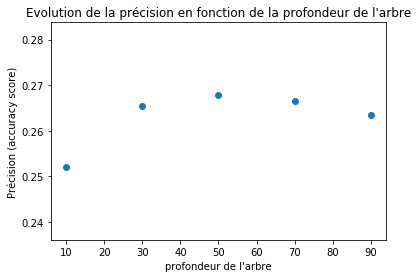

[0.25206, 0.26536, 0.26782, 0.26648, 0.26346]

In [15]:
compare_depth_DT(10,110,20)


#### Decision Tree of max_depth 100 ####
Reading data...
Extracting features...
Training set:  4.944825300000048 s
Test set:  0.6015061999999034 s
Fitting the model...
651.4623459 s
Predicting emojis...
0.028046100000210572 s
Evaluating the model...
Score:  0.26204
Train accuracy:  0.5678935771225567
Test accuracy:  0.26204
Total time:  657.0367235000001 s

#### Decision Tree of max_depth 300 ####
Reading data...
Extracting features...
Training set:  4.95789579999996 s
Test set:  0.512983899999881 s
Fitting the model...
1328.3209098 s
Predicting emojis...
0.047059799999715324 s
Evaluating the model...
Score:  0.24506
Train accuracy:  0.8634381327727726
Test accuracy:  0.24506
Total time:  1333.8388492999995 s

#### Decision Tree of max_depth 500 ####
Reading data...
Extracting features...
Training set:  5.239360000000033 s
Test set:  0.6095212999998694 s
Fitting the model...
1495.5156051 s
Predicting emojis...
0.04951419999997597 s
Evaluating the model...
Score:  0.23966
Train accurac

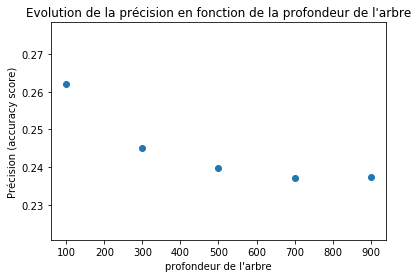

[0.26204, 0.24506, 0.23966, 0.2371, 0.23738]

In [16]:
compare_depth_DT(100,1100,200)

On remarque sur les deux graphiques ci-dessus que le maximum de précision est atteint pour une profondeur de 50. La précision est alors égale à 26.8%.

###### Etude de l'influence du critère de séparation

In [17]:
classifier = DecisionTreeClassifier(criterion = "entropy",max_depth=50)
score,test_pred =try_model("us",classifier=classifier)

Reading data...
Extracting features...
Training set:  5.244880500000363 s
Test set:  0.6200513999992836 s
Fitting the model...
457.7938119999999 s
Predicting emojis...
0.020791799999642535 s
Evaluating the model...
Score:  0.24528
Train accuracy:  0.5062230449357664
Test accuracy:  0.24528
Total time:  463.6795356999992 s


In [18]:
classifier = DecisionTreeClassifier(criterion = "gini",max_depth=50)
score,test_pred =try_model("us",classifier=classifier)

Reading data...
Extracting features...
Training set:  5.295103599999493 s
Test set:  0.5671636000006401 s
Fitting the model...
217.8875074000007 s
Predicting emojis...
0.019480300001305295 s
Evaluating the model...
Score:  0.26772
Train accuracy:  0.37624744477454886
Test accuracy:  0.26772
Total time:  223.76925490000212 s


D'après les deux tests effectués ci-dessus, le meilleur critère est celui de Gini, qui permet d'obtenir une précision de 27%.

###### Etude de l'influence de la stratégie de séparation à chaque noeud

In [19]:
classifier = DecisionTreeClassifier(splitter='best',criterion = "gini",max_depth=50)
score,test_pred =try_model("us",classifier=classifier)

Reading data...
Extracting features...
Training set:  5.077955600001587 s
Test set:  0.5474131999999372 s
Fitting the model...
229.67845359999956 s
Predicting emojis...
0.019517499998983112 s
Evaluating the model...
Score:  0.26802
Train accuracy:  0.3763367419095589
Test accuracy:  0.26802
Total time:  235.32333990000006 s


In [20]:
classifier = DecisionTreeClassifier(splitter='random',criterion = "gini",max_depth=50)
score,test_pred =try_model("us",classifier=classifier)

Reading data...
Extracting features...
Training set:  5.065042500000345 s
Test set:  0.5419932000004337 s
Fitting the model...
193.49659989999964 s
Predicting emojis...
0.01897859999917273 s
Evaluating the model...
Score:  0.27
Train accuracy:  0.36062768645603804
Test accuracy:  0.27
Total time:  199.1226141999996 s


Au vu des résultats obtenus aux tests ci-dessus, la meilleure stratégie de séparation est celle "best" et non celle "random".

###### Sur le dataset ES

In [21]:
classifier = DecisionTreeClassifier(splitter='best',criterion = "gini",max_depth=50)
score,test_pred =try_model("us",classifier=classifier)

Reading data...
Extracting features...
Training set:  5.077769999999873 s
Test set:  0.5662423000012495 s
Fitting the model...
217.55954329999986 s
Predicting emojis...
0.018421499999021762 s
Evaluating the model...
Score:  0.268
Train accuracy:  0.3762739925714437
Test accuracy:  0.268
Total time:  223.2219771 s


In [22]:
classifier = DecisionTreeClassifier(splitter='best',criterion = "gini",max_depth=50)
score,test_pred =try_model("es",classifier=classifier)

Reading data...
Extracting features...
Training set:  0.9438406999997824 s
Test set:  0.09407429999919259 s
Fitting the model...
19.968650300001173 s
Predicting emojis...
0.004427500000019791 s
Evaluating the model...
Score:  0.228
Train accuracy:  0.42605542605542607
Test accuracy:  0.228
Total time:  21.010992800000167 s


#### Random forest
##### Généralités

Un random forest est un estimateur qui ajuste un certain nombre de classificateurs Decision Tree sur des sous-échantillons de l'ensemble de données et utilise la moyenne pour améliorer la précision. On peut contrôler le nombre d'estimateurs avec le paramètre n_estimators.

##### Mise en oeuvre
###### Etude de l'influence de la profondeur

In [23]:
def compare_depth_RF(d_min, d_max, step=1,language="us",feature_extractor=CountVectorizer(), verbose=True):
    results,depths=list(),list()
    for i in range (d_min, d_max, step):
        print("\n#### Random forest of max_depth",i,"####")
        classifier = RandomForestClassifier(max_depth=int(i))
        score,test_pred =try_model(language, feature_extractor, classifier, verbose)
        results.append(score)
        depths.append(i)
    
    print("Drawing the results...")
    plt.scatter(depths, results)
    plt.xlabel('profondeur de l\'arbre')
    plt.ylabel('Précision (accuracy score)')
    plt.title('Evolution de la précision en fonction de la profondeur de l\'arbre')
    plt.show()
    return results


#### Random forest of max_depth 10 ####
Reading data...
Extracting features...
Training set:  5.126505799998995 s
Test set:  0.5492778999996517 s
Fitting the model...
11.508643799999845 s
Predicting emojis...
0.8963859000014054 s
Evaluating the model...
Score:  0.21596
Train accuracy:  0.21656727332404965
Test accuracy:  0.21596
Total time:  18.080813399999897 s

#### Random forest of max_depth 30 ####
Reading data...
Extracting features...
Training set:  4.9416977999990195 s
Test set:  0.54881209999985 s
Fitting the model...
75.80765400000018 s
Predicting emojis...
1.1961498000000574 s
Evaluating the model...
Score:  0.21618
Train accuracy:  0.21739990877211612
Test accuracy:  0.21618
Total time:  82.49431369999911 s

#### Random forest of max_depth 50 ####
Reading data...
Extracting features...
Training set:  5.241954299999634 s
Test set:  0.5967799000009109 s
Fitting the model...
275.88038550000056 s
Predicting emojis...
1.55227240000022 s
Evaluating the model...
Score:  0.2206
Tra

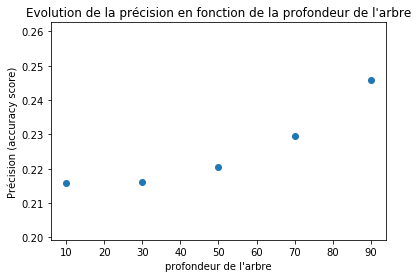

[0.21596, 0.21618, 0.2206, 0.22958, 0.24594]

In [24]:
compare_depth_RF(10,110,20)


#### Random forest of max_depth 100 ####
Reading data...
Extracting features...
Training set:  5.097350499998356 s
Test set:  0.5502364000003581 s
Fitting the model...
1253.9417276999993 s
Predicting emojis...
2.296171300000424 s
Evaluating the model...
Score:  0.25156
Train accuracy:  0.3123830991898095
Test accuracy:  0.25156
Total time:  1261.8854858999985 s

#### Random forest of max_depth 300 ####
Reading data...
Extracting features...
Training set:  5.341073500001585 s
Test set:  0.5452781999993022 s
Fitting the model...
8509.4728945 s
Predicting emojis...
5.4580053000026965 s
Evaluating the model...
Score:  0.31024
Train accuracy:  0.8309098412683089
Test accuracy:  0.31024
Total time:  8520.817251500004 s

#### Random forest of max_depth 500 ####
Reading data...
Extracting features...
Training set:  5.153558300000441 s
Test set:  0.5441651000001002 s
Fitting the model...
13807.198258899996 s
Predicting emojis...
10.739708999994036 s
Evaluating the model...
Score:  0.31756
Trai

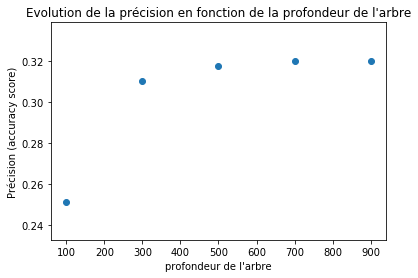

[0.25156, 0.31024, 0.31756, 0.32042, 0.3201]

In [25]:
compare_depth_RF(100,1100,200)

D'après les expérimentations que nous avions menées précédemment, la valeur de profondeur qui maximisait la précision était de 50, avec une précision de 22.06%. Cependant, ces expérimentations n'étaient pas exhaustives : nous avions testé uniquement certaines valeurs "au hasard", valeurs qui étaient 10, 50 et 1000. En effet, les temps d'exécution étant très longs, nous nous étions cantonnées à ces quelques valeurs. Suite à la présentation et à vos remarques, nous avons estimé qu'il serait judicieux de faire une nouvelle expérimentation. Et les résultats ne se sont pas fait attendre ! Après 10 heures d'exécution, la profondeur qui maximise la précision est 800, pour une précision de 32.04%, bien au dessus des 22% obtenus précedemment. 

###### Etude de l'influence du nombre d'estimateurs

Pour étudier l'influence du nombre d'estimateurs, on a choisi de rester sur une profondeur maximale de 50 pour limiter le temps de calcul.

In [26]:
def compare_nb_estimators_RF(nb_e_min, nb_e_max, step=1,language="us",feature_extractor=CountVectorizer(), verbose=True):
    results,estimators=list(),list()
    for i in range (nb_e_min, nb_e_max, step):
        print("\n#### Random forest of max",i,"estimators ####")
        classifier = RandomForestClassifier(n_estimators=int(i),max_depth = 50)
        score,test_pred =try_model(language, feature_extractor, classifier, verbose)
        results.append(score)
        estimators.append(i)
    
    print("Drawing the results...")
    plt.scatter(estimators, results)
    plt.xlabel('Nombre d\'estimateurs')
    plt.ylabel('Précision (accuracy score)')
    plt.title('Evolution de la précision en fonction du nombre d\'estimateurs de la random forest')
    plt.show()
    return results


#### Random forest of max 10 estimators ####
Reading data...
Extracting features...
Training set:  4.917526000004727 s
Test set:  0.5273932999989484 s
Fitting the model...
25.026783799999976 s
Predicting emojis...
0.1628813999996055 s
Evaluating the model...
Score:  0.2278
Train accuracy:  0.2445800259203035
Test accuracy:  0.2278
Total time:  30.634584500003257 s

#### Random forest of max 30 estimators ####
Reading data...
Extracting features...
Training set:  5.16064479999477 s
Test set:  0.5527670000010403 s
Fitting the model...
81.13318179998896 s
Predicting emojis...
0.4745441999984905 s
Evaluating the model...
Score:  0.22522
Train accuracy:  0.23410329989115403
Test accuracy:  0.22522
Total time:  87.32113779998326 s

#### Random forest of max 50 estimators ####
Reading data...
Extracting features...
Training set:  5.223193700003321 s
Test set:  0.5545418000110658 s
Fitting the model...
134.20657089998713 s
Predicting emojis...
0.7884429999976419 s
Evaluating the model...
Scor

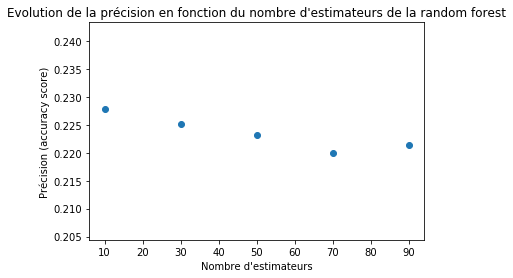

[0.2278, 0.22522, 0.2231, 0.21998, 0.22144]

In [27]:
compare_nb_estimators_RF(10,110,20)


#### Random forest of max 100 estimators ####
Reading data...
Extracting features...
Training set:  5.112525599994115 s
Test set:  0.5299329999979818 s
Fitting the model...
247.52860629999486 s
Predicting emojis...
1.5663843999936944 s
Evaluating the model...
Score:  0.22022
Train accuracy:  0.2275097925169001
Test accuracy:  0.22022
Total time:  254.73744929998065 s

#### Random forest of max 300 estimators ####
Reading data...
Extracting features...
Training set:  5.231413700006669 s
Test set:  0.5510697999998229 s
Fitting the model...
766.4423384999973 s
Predicting emojis...
4.676635700001498 s
Evaluating the model...
Score:  0.22022
Train accuracy:  0.22607862492065828
Test accuracy:  0.22022
Total time:  776.9014577000053 s

#### Random forest of max 500 estimators ####
Reading data...
Extracting features...
Training set:  5.153954599998542 s
Test set:  0.5531767000065884 s
Fitting the model...
1335.35211729999 s
Predicting emojis...
7.817448800007696 s
Evaluating the model...
Sc

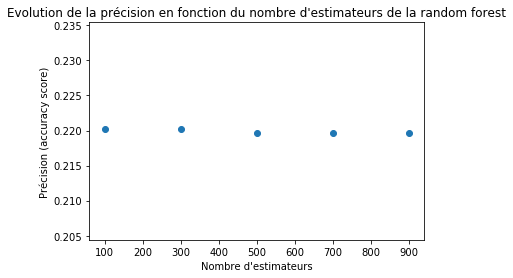

[0.22022, 0.22022, 0.21964, 0.21962, 0.2197]

In [28]:
compare_nb_estimators_RF(100,1100,200)

Au vu des résultats obtenus, le nombre d'estimateurs idéal pour une profondeur de 50 est 10, avec une précision de 22.70%.

### Algo 3 : Réseaux de neurones

Nous avons fait quelques tests sur un réseau de neurones assez simple mais celui-ci ne parvient pas à surpasser naive Bayes sur ce problème de classification de texte.

### Algo 4 : SVM

#### Principe

Les SVM sont une technique d'apprentissage supervisé dont l'idée est de séparer les données à l'aide d'hyperplans séparateurs en maximisant la marge entre les données les plus proches de chaque côté de cet hyperplan. A l'origine, cette méthode est utilisée pour les problèmes binaire, mais plusieurs stratégies existent pour traiter des problèmes multi-classes.

Les svm existent dans scikit learn [[doc svm]](https://scikit-learn.org/stable/modules/svm.html) mais pas avec des string kernels. Nous avons tenté de créer un noyau car scikit learn permet de personnaliser le noyau mais au vu de ses piètres performances, nous nous sommes rabattues sur les noyaux proposés dans la librairie.

#### Expérimentations

##### Etude de l'influence du nombre d'itérations

In [29]:
def compare_svm(min_iter,max_iter,step=1,language="us",kernel="rbf",feature_extractor=CountVectorizer(),verbose=True):
    results,iterations=list(),list()
    for i in range (min_iter,max_iter,step):
        print("\n#### SVM with",i,"iterations ####")
        classifier = svm.SVC(kernel=kernel,max_iter=int(i))
        score,test_pred =try_model(language, feature_extractor, classifier, verbose)
        results.append(score)
        iterations.append(i)
    
    print("Drawing the results...")
    plt.scatter(iterations, results)
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Précision (accuracy score)')
    plt.title('Evolution de la précision en fonction du nombre d\'itérations du SVM')
    plt.show()
    return results


#### SVM with 10 iterations ####
Reading data...
Extracting features...
Training set:  5.123764499992831 s
Test set:  0.5602153999934671 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


16.629019400003017 s
Predicting emojis...
7.789230800000951 s
Evaluating the model...
Score:  0.15258
Train accuracy:  0.15930608885788963
Test accuracy:  0.15258
Total time:  30.102230099990265 s

#### SVM with 30 iterations ####
Reading data...
Extracting features...
Training set:  5.211836500006029 s
Test set:  0.5586977000057232 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


43.79968430000008 s
Predicting emojis...
21.24967590000597 s
Evaluating the model...
Score:  0.15736
Train accuracy:  0.1662664385165091
Test accuracy:  0.15736
Total time:  70.8198944000178 s

#### SVM with 50 iterations ####
Reading data...
Extracting features...
Training set:  4.834503500009305 s
Test set:  0.5181489999959012 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


71.6999327000085 s
Predicting emojis...
32.76611719999346 s
Evaluating the model...
Score:  0.16298
Train accuracy:  0.16935805013672114
Test accuracy:  0.16298
Total time:  109.81870240000717 s

#### SVM with 70 iterations ####
Reading data...
Extracting features...
Training set:  5.220968099994934 s
Test set:  0.5703676999983145 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=70).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


100.14368169999216 s
Predicting emojis...
43.829563299994334 s
Evaluating the model...
Score:  0.15832
Train accuracy:  0.16722698607688724
Test accuracy:  0.15832
Total time:  149.76458079997974 s

#### SVM with 90 iterations ####
Reading data...
Extracting features...
Training set:  5.176063200007775 s
Test set:  0.5679505000007339 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=90).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


130.10176089999732 s
Predicting emojis...
53.470701300000655 s
Evaluating the model...
Score:  0.16414
Train accuracy:  0.1741994029159135
Test accuracy:  0.16414
Total time:  189.31647590000648 s
Drawing the results...


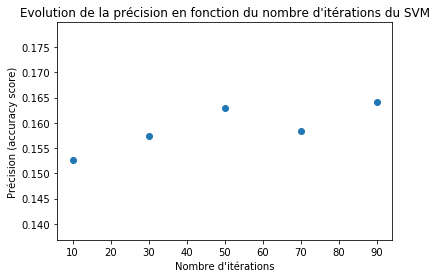

[0.15258, 0.15736, 0.16298, 0.15832, 0.16414]

In [30]:
compare_svm(10,110,step=20)

On remarque que l'on converge à partir de 10 itérations. Pour la suite on fixera donc le nombre d'itérations à 25, pour ne pas être trop juste mais garder le bénéfice de faire peu d'itérations (moins de temps de calcul).

##### Etude de l'influence du noyau

In [31]:
max_iter=25
score,test_pred=try_model("us", classifier=svm.SVC(kernel='linear',max_iter=max_iter))

Reading data...
Extracting features...
Training set:  4.851938399995561 s
Test set:  0.5256702000042424 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


42.89725949999411 s
Predicting emojis...
33.37176409999665 s
Evaluating the model...
Score:  0.0315
Train accuracy:  0.03192010561196292
Test accuracy:  0.0315
Total time:  81.64663219999056 s


In [32]:
score,test_pred=try_model("us", classifier=svm.SVC(kernel='poly',max_iter=max_iter))

Reading data...
Extracting features...
Training set:  5.127742099997704 s
Test set:  0.5542760000098497 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


40.60392359999241 s
Predicting emojis...
23.321936799999094 s
Evaluating the model...
Score:  0.02022
Train accuracy:  0.025201099561478663
Test accuracy:  0.02022
Total time:  69.60787849999906 s


In [33]:
score,test_pred=try_model("us", classifier=svm.SVC(kernel='rbf',max_iter=max_iter))

Reading data...
Extracting features...
Training set:  5.1656665999908 s
Test set:  0.5805012000055285 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


33.57537430000957 s
Predicting emojis...
18.802653099992312 s
Evaluating the model...
Score:  0.16642
Train accuracy:  0.17350916019664678
Test accuracy:  0.16642
Total time:  58.12419519999821 s


Le noyau qui offre les meilleurs résultats est donc le noyau rbf. Ce n'est pas une surprise car il est réputé plus performant que les deux autres dans le cas de problèmes multiclasses.

### Tests pour un jeu de données avec moins de classes

Les résultats obtenus pour la précision étant très bas, j'ai souhaité me "rassurer" un peu en testant les algorithmes sur un nombre réduit de classes. On sélectionne donc les n premières classes et on récupère tous les tweets correspondants pour en faire un dataset réduit. On applique alors les algorithmes sur ce dataset réduit.

In [34]:
def create_new_dataset(path_data,path_labels,classes=2):
    file_data = open(path_data, "r", encoding="utf8")
    file_labels = open(path_labels, "r", encoding="utf8")
    data = file_data.readlines()
    file_data.close()
    labels = file_labels.readlines()
    file_labels.close()
    new_labels=[]
    new_data=[]
    for i in range(len(data)):
        data[i]=data[i].replace("\n","")
        labels[i]=labels[i].replace("\n","")
        if (int(labels[i])<classes):
            new_labels+=[labels[i]]
            new_data+=[data[i]]

    liste_2_np = []
    for i in range (0,len(new_labels)):
        tmp=[new_data[i],new_labels[i]]
        liste_2_np+=[tmp]

    np_array=np.array(liste_2_np)
    data_df = pd.DataFrame(np_array, columns = ["tweet_text","label"])
    return data_df


In [35]:
def modified_try_model(language, feature_extractor=CountVectorizer(), classifier=DecisionTreeClassifier(max_depth=25),number_of_classes=19, verbose=True):
    tt = 0 # Total time
    train_df = create_new_dataset ('data/train/tweets.'+language+'.text','data/train/tweets.'+language+'.labels',number_of_classes)
    test_df = create_new_dataset ('data/test/tweets.'+language+'.text','data/test/tweets.'+language+'.labels',number_of_classes)
    train_text,train_labels = train_df["tweet_text"],train_df["label"]
    test_text,test_labels = test_df["tweet_text"],test_df["label"]
    # Feature extraction
    if (verbose):
        print("Extracting features...")
    t = time.perf_counter()
    train_features = feature_extractor.fit_transform(train_text)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print("Training set: ", t, "s")
        
    t = time.perf_counter()
    test_features = feature_extractor.transform(test_text)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print("Test set: ", t, "s")
    
    # Fit model
    if (verbose):
        print("Fitting the model...")
    t = time.perf_counter()
    classifier.fit(train_features, train_labels)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print(t, "s")
    
    # Predict labels
    if (verbose):
        print("Predicting emojis...")
    t = time.perf_counter()
    test_pred = classifier.predict(test_features)
    t = time.perf_counter() - t
    tt += t
    if (verbose):
        print(t, "s")
    
    # Evaluate model
    if (verbose):
        print("Evaluating the model...")
    score = classifier.score(test_features, test_labels)
    train_acc = accuracy_score(train_labels, classifier.predict(train_features))
    test_acc = accuracy_score(test_labels, classifier.predict(test_features))
    
    if(verbose):
        print("Score: ", score)
        print("Train accuracy: ", train_acc)
        print("Test accuracy: ", test_acc)
        print("Total time: ", tt, "s")
        
    return score,test_pred

In [36]:
modified_try_model("us",number_of_classes=2)

Extracting features...
Training set:  1.7343567999923835 s
Test set:  0.16806690000521485 s
Fitting the model...
10.637295699998504 s
Predicting emojis...
0.002810299993143417 s
Evaluating the model...
Score:  0.6902354747888405
Train accuracy:  0.719220356524152
Test accuracy:  0.6902354747888405
Total time:  12.542529699989245 s


(0.6902354747888405, array(['1', '0', '0', ..., '0', '0', '0'], dtype=object))

In [37]:
modified_try_model("us",number_of_classes=4)

Extracting features...
Training set:  2.503570299988496 s
Test set:  0.24360000000160653 s
Fitting the model...
18.44715539999015 s
Predicting emojis...
0.005397900007665157 s
Evaluating the model...
Score:  0.5032283568322572
Train accuracy:  0.5348076505656149
Test accuracy:  0.5032283568322572
Total time:  21.19972359998792 s


(0.5032283568322572, array(['0', '2', '0', ..., '0', '0', '0'], dtype=object))

In [38]:
modified_try_model("us",classifier=RandomForestClassifier(n_estimators=10),number_of_classes=2)

Extracting features...
Training set:  1.6949135000031674 s
Test set:  0.1677390000113519 s
Fitting the model...
100.78537830000278 s
Predicting emojis...
0.31756889999087434 s
Evaluating the model...
Score:  0.7001535705144613
Train accuracy:  0.9721245209722296
Test accuracy:  0.7001535705144613
Total time:  102.96559970000817 s


(0.7001535705144613, array(['0', '0', '0', ..., '0', '0', '0'], dtype=object))

In [39]:
modified_try_model("us",classifier=RandomForestClassifier(n_estimators=10),number_of_classes=4)

Extracting features...
Training set:  2.4876569000043673 s
Test set:  0.2494077000010293 s
Fitting the model...
309.3171164999949 s
Predicting emojis...
0.41193139999813866 s
Evaluating the model...
Score:  0.5154829358281724
Train accuracy:  0.9747908916068914
Test accuracy:  0.5154829358281724
Total time:  312.4661124999984 s


(0.5154829358281724, array(['0', '0', '0', ..., '0', '0', '0'], dtype=object))

In [40]:
modified_try_model("us",classifier=svm.SVC(kernel='rbf',max_iter=max_iter),number_of_classes=2)

Extracting features...
Training set:  1.6952973999868846 s
Test set:  0.16587919999437872 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.7501637999957893 s
Predicting emojis...
0.043962700001429766 s
Evaluating the model...
Score:  0.49385717942155105
Train accuracy:  0.508868107062238
Test accuracy:  0.49385717942155105
Total time:  2.6553030999784824 s


(0.49385717942155105, array(['0', '1', '1', ..., '0', '1', '0'], dtype=object))

In [41]:
modified_try_model("us",classifier=svm.SVC(kernel='rbf',max_iter=max_iter),number_of_classes=4)

Extracting features...
Training set:  2.477672099994379 s
Test set:  0.24819929999648593 s
Fitting the model...


D:\Logiciels\anaconda3\envs\ESIR-PYTHON\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


2.719461799992132 s
Predicting emojis...
0.3069060999987414 s
Evaluating the model...
Score:  0.4303158079676725
Train accuracy:  0.4228456913827655
Test accuracy:  0.4303158079676725
Total time:  5.752239299981738 s


(0.4303158079676725, array(['3', '0', '0', ..., '0', '0', '3'], dtype=object))

Les résultats sur un nombre réduit de classes sont bons ! Et il est à noter qu'il est en fait normal d'avoir une précision basse pour ce problème, car il comporte de très nombreuses classes. Obtenir un score moyen de 25% n'est donc pas mauvais.

## Comparaison des algorithmes utilisés (sur les données US)

### Complexité

|  | NaiveBayes | DecisionTree | RandomForest | SVM |
| ----- | ---------- | ------------ | ------------ | --- |
| temps total d'exécution (secondes)| 20 | 200 | 16000 | 70 |

L'algorithme Naive Bayes est, sans surprise, le plus rapide.

### Précision

|  | NaiveBayes | DecisionTree | RandomForest | SVM |
| ----- | ---------- | ------------ | ------------ | --- |
| précision (%) | 36 | 27 | 32 | 16 |

L'algorithme Naive Bayes est également le plus performant en terme de précision.

## Conclusion

En conclusion, ce projet nous a permis de mettre en oeuvre les techniques de classification vues en cours et de se confronter aux difficultés telles que le choix de la représentation des données, ou le choix des paramètres.

Nous avons fait l'erreur de vouloir tester trop de techniques, si bien que nous nous sommes retrouvées à court de temps. Il aurait certainement mieux valu commencer par choisir notre représentation de données, plus s'attaquer aux algorithmes un à un en cherchant à bien les optimiser. Cependant nous sommes quand même satisfaites de ce projet qui nous aura beaucoup appris.